# **Hands-on 2: kNN Notebook (Tutorial)**

**Alumno: Claudio Francisco Ponce Sandoval**


---

# Fundamentos de la técnica.
El algoritmo **k-Nearest Neighbors o kNN** es una de las técnicas más simples e intuitivas de aprendizaje supervisado. Se utiliza tanto para clasificación como para regresión.

El principio fundamental es el siguiente:

Un objeto se clasifica según la mayoría de las clases presentes entre sus **k vecinos más cercanos** en el espacio de características.

Para calcular la cercanía entre instancias, kNN utiliza comúnmente la distancia Euclidiana, aunque pueden emplearse otras métricas como Manhattan o Minkowski.


- Cuando llega un patrón nuevo, el algoritmo mide qué tan cerca se encuentra de todos los puntos conocidos.

- Se eligen los k puntos con menor distancia al patrón nuevo.

- La clase del patrón nuevo es la clase más frecuente entre esos vecinos.

- Objetos que están **cerca entre sí** suelen pertenecer a la **misma clase**; kNN explota esa estructura natural del espacio.
- Es robusto cuando los datos están bien distribuidos.
- No hace suposiciones fuertes sobre la forma de la distribución; por eso se considera un algoritmo flexible y simple de implementar.


Aun asi, por su simplicidad, claridad y efectividad, kNN es uno de los clasificadores fundamentales en aprendizaje automático.


# Modelo Matemático de kNN

## Distancia Euclidiana

Es la métrica de distancia más común. Mide la longitud de la línea recta entre dos puntos.

Sea un punto nuevo $x$ y un punto $p$ del conjunto de entrenamiento, donde:
$$
x = (x_1, x_2, ..., x_n)
$$
$$
p = (p_1, p_2, ..., p_n)
$$

La distancia euclidiana $d(x,p)$ es:
$$
d(x,p)=\sqrt{\sum_{i=1}^{n}(x_i - p_i)^2}
$$


---

## 3. Regla de Clasificación de kNN

Para predecir la clase de un nuevo punto $x$:

1.  Se encuentran los $k$ vecinos más cercanos,$$V_k(x)=\{v_1, v_2, ..., v_k\} $$
    

2.  La clase predicha ($\hat{y}$) es la **moda** (la clase más frecuente) de las clases de esos $k$ vecinos $$(y_1, y_2, ..., y_k):\hat{y} = \operatorname{mode}(y_1, y_2, ..., y_k)$$
    



# Descripción de librerías, clases, funciones en su respectiva sección

- pandas: Utilizada para cargar (read_csv) y manipular tus datos en una tabla estructurada llamada DataFrame.

- matplotlib.pyplot: La biblioteca base para crear gráficos. Se usa para plt.scatter (gráficos de dispersión) y para configurar etiquetas y leyendas.

- seaborn: Construida sobre matplotlib, se usa para visualizaciones estadísticas más atractivas, específicamente sns.heatmap para dibujar la matriz de confusión.

- sklearn (scikit-learn): La biblioteca central de Machine Learning. De ella use:

  - preprocessing: Para escalar los datos.

  - neighbors: Contiene el modelo KNN.

  - model_selection: Para dividir los datos.

  - metrics: Para evaluar el rendimiento del modelo.



---



- train_test_split(): Separa los datos (datos_escalados y clase) en cuatro conjuntos: dos para entrenar (X_train, y_train) y dos para probar (X_test, y_test).

- .fit(): Es el método de entrenamiento.

- .predict(): Método del clasificador. Recibe datos nuevos ya escalados y devuelve la predicción de la clase (0 o 1) basada en la votación de sus vecinos.

- accuracy_score(): Calcula el porcentaje total de predicciones correctas.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Cargar del dataset
clientes = pd.read_csv("creditos.csv")
clientes


,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


# Preprocesamiento


In [41]:
clientes.describe() # Me devuelve las estadísticas descriptivas DataFrame cliente

,edad,credito,cumplio
count,200.000000,200.000000,200.000000
mean,37.280000,289946.670000,0.835000
std,9.148776,137945.585277,0.372112
min,18.000000,100000.000000,0.000000
25%,29.000000,172966.500000,1.000000
50%,37.500000,276234.000000,1.000000
75%,45.000000,394574.500000,1.000000
max,57.000000,596771.000000,1.000000


In [26]:
# Como primer paso vamos a separar nuestros datos en clinetes que si pagaron y clinetes que no pagaron

buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]
buenos,malos

#Podemos observar al ejecutarlo perimer dataframe que son los que si pagaron y debajo los que no pagaron.

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

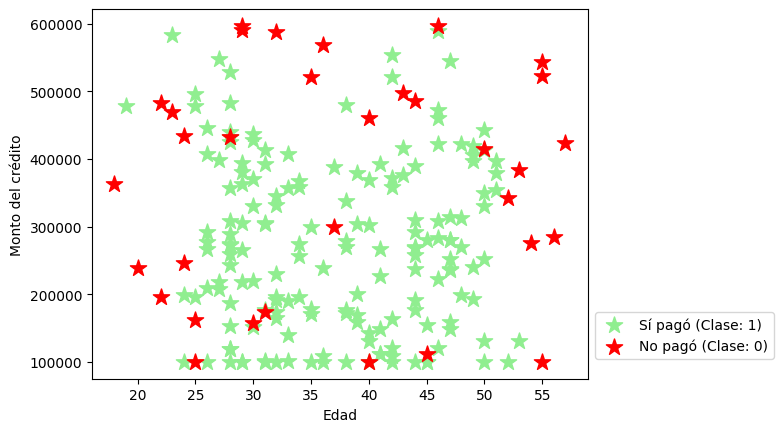

In [27]:
#Grafico de dispersion

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="lightgreen",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

# Feature Engineering

### Selección de variables

En este dataset tenemos dos variables principales:

- **edad**
- **credito**

Ambas son relevantes para predecir si un cliente cumplirá o no.


In [28]:
# Preparación de los datos

datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

# Escalar
escalador = preprocessing.MinMaxScaler()

datos_escalados = escalador.fit_transform(datos)
datos_escalados

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

# Prediction

In [29]:
# Creación del Modelo KNN

clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos_escalados, clase)


KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(




--- Resultados de la Predicción ---

Edad: 53
Crédito: 350000
Clase predicha: 0
Probabilidad [No pagará, Sí pagará]: [0.66666667 0.33333333]

--- Gráfico de Posicionamiento ---


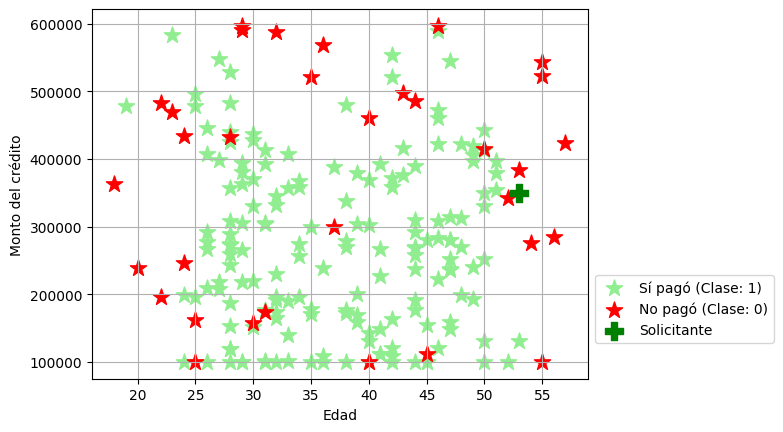

np.int64(0)

In [38]:
def predecir_cliente(edad, credito, datos_buenos, datos_malos):

    entrada = escalador.transform([[edad, credito]])

    clase_predicha = clasificador.predict(entrada)[0]
    prob = clasificador.predict_proba(entrada)[0]


    print("\n\n--- Resultados de la Predicción ---\n")
    print("Edad:", edad)
    print("Crédito:", credito)
    print("Clase predicha:", clase_predicha)
    print("Probabilidad [No pagará, Sí pagará]:", prob)


    print("\n--- Gráfico de Posicionamiento ---")

    #Código para graficar
    plt.scatter(datos_buenos["edad"], datos_buenos["credito"],
                marker="*", s=150, color="lightgreen", label="Sí pagó (Clase: 1)")
    plt.scatter(datos_malos["edad"], datos_malos["credito"],

                marker="*", s=150, color="red", label="No pagó (Clase: 0)")

    # Nuevo solicitante
    plt.scatter(edad, credito, marker="P", s=150, color="green", label="Solicitante")

    # Etiquetas y leyenda
    plt.ylabel("Monto del crédito")
    plt.xlabel("Edad")
    plt.legend(bbox_to_anchor=(1, 0.3))
    plt.grid(True)
    plt.show()

    return clase_predicha

# Ejemplo
predecir_cliente(53, 350000, buenos, malos)





# Model Evaluation

Accuracy del modelo: 92.50%



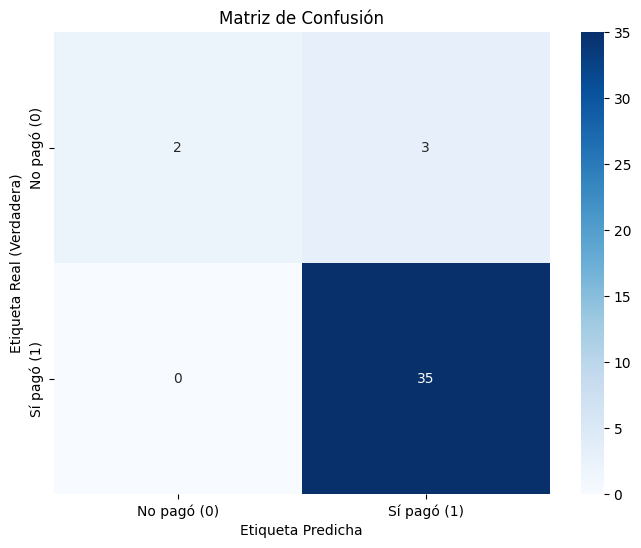

In [40]:
X_train, X_test, y_train, y_test = train_test_split(datos_escalados, clase, test_size=0.2, random_state=42)

modelo_eval = KNeighborsClassifier(n_neighbors=3)
modelo_eval.fit(X_train, y_train)

predicciones = modelo_eval.predict(X_test)

# Matriz de confusión
matriz = confusion_matrix(y_test, predicciones)

# Accuracy
acc = accuracy_score(y_test, predicciones)

# Imprimir el Accuracy
print(f"Accuracy del modelo: {acc * 100:.2f}%\n")



# Se definen los nombres de las etiquetas (clases)
labels = ['No pagó (0)', 'Sí pagó (1)']

# Se crean la figura y los ejes
plt.figure(figsize=(8, 6))

sns.heatmap(matriz,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real (Verdadera)')
plt.xlabel('Etiqueta Predicha')


plt.show()


# Referencias Bibliograficas


Korstanje, J. (2022, 1 septiembre). The k-Nearest Neighbors (kNN) Algorithm in Python. https://realpython.com/knn-python/

Na, & Na. (2024, 30 octubre). Algoritmo K-Nearest Neighbor | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

Codigo Maquina. (2021, 4 octubre). K-Vecinos Más Cercanos (KNN) para Clasificación con Python [Vídeo]. YouTube. https://www.youtube.com/watch?v=XN6fChNqfbs
